#CLASSIFICATION MODELS

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(C=0.68,penalty='l2',solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.68, solver='liblinear')

###Extracting Feature Importance from the model

In [ ]:
features = X_train.columns
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

In [ ]:
import numpy as np

feature_importance['OddsRatio'] = np.exp(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='OddsRatio', ascending=False)
display(feature_importance)


,Feature,Coefficient,OddsRatio
9,TitleGroup_Mrs,1.009910,2.745354
1,Sex,0.991482,2.695225
3,Fare,0.342393,1.408313
11,TitleGroup_Royalty,0.130675,1.139597
12,Embarked_Q,0.020790,1.021008
17,AgeGroup_senior,-0.014939,0.985172
5,IsAlone,-0.137725,0.871338
7,TitleGroup_Miss,-0.149103,0.861480
2,Age,-0.342829,0.709760
13,Embarked_S,-0.354741,0.701355


### Visualizing Analysis of Feature Importance

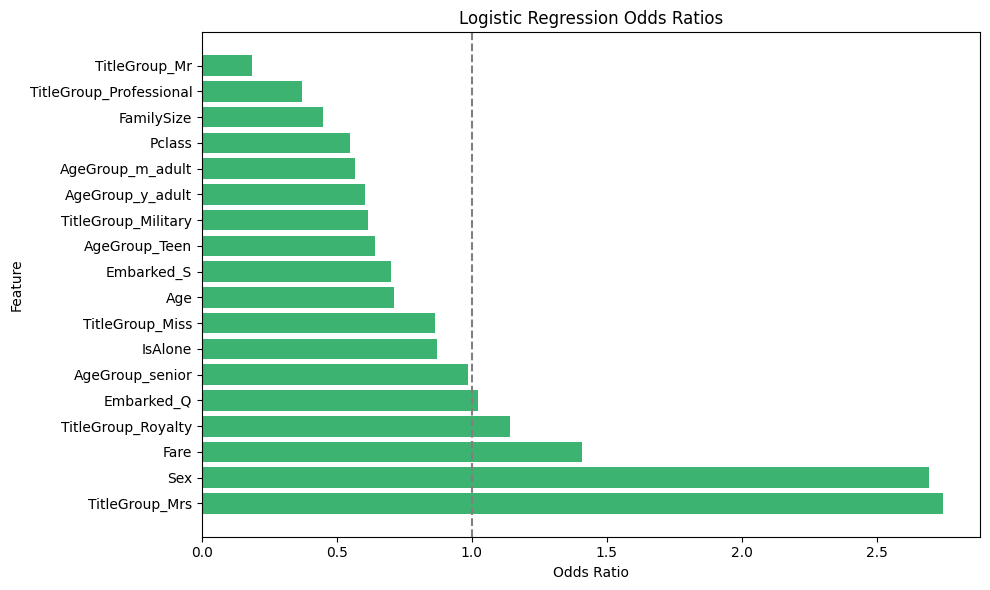

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['OddsRatio'], color='mediumseagreen')
plt.axvline(1, color='gray', linestyle='--')
plt.title('Logistic Regression Odds Ratios')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Predicting Surivival Outcome

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

### Evaluating Model Performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



- Accuracy: Overall correct predictions.
- Precision: How many predicted survivors were correctly predicted.
- Recall: How many actual survivors were correctyl predicted.
- F1-Score; Balance btw precision and recall.

##Evaluate Matrix Performance

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_plot(title, y_test, y_pred):

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title)
  plt.show()

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



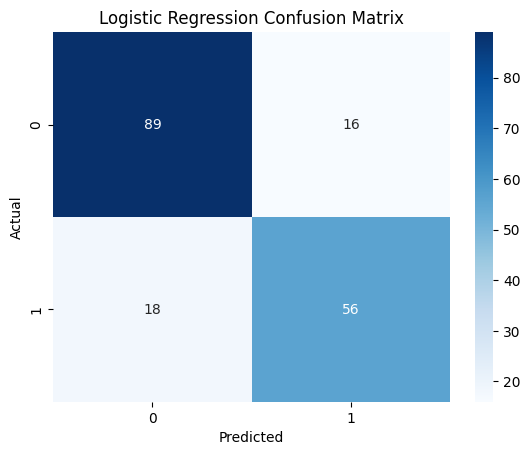

In [ ]:
confusion_matrix_plot("Logistic Regression Confusion Matrix", y_test, y_pred)



*   True Negatives (TN)  - 89 - correctly predicted non-survivors
*   False Positives (FP) - 16 - Predicted survival, but they did not
*   False Negatives (FN) - 18 - Predicted non-survival, but they did survive
*   True Positives (TP)  - 56 - Correctly predicted survivors



*italicized text*##K-Nearest Neighbors Classifier

### STEP1: Import and Initialize KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the model with K=5 (TUNE K LATER)
knn_model = KNeighborsClassifier(n_neighbors=5)

### STEP 2: Train the Model

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### STEP 3: Make Predictions

In [ ]:
y_pred_knn = knn_model.predict(X_test)

### STEP 4: Evaluate Performance

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



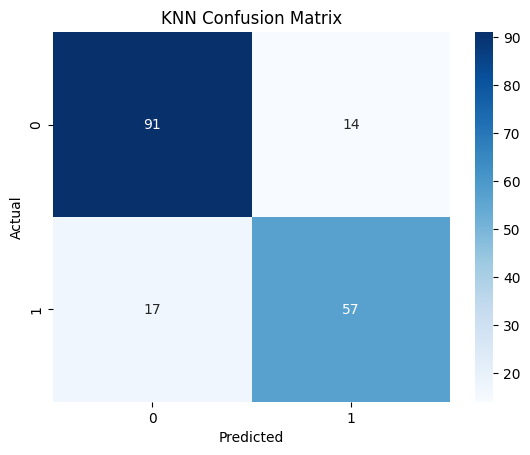

In [ ]:
confusion_matrix_plot("KNN Confusion Matrix", y_test, y_pred_knn)

### Step 5: Tune K with Cross-Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  print(f"K={k}, Mean CV Accuracy: {scores.mean(): .4f}")

K=1, Mean CV Accuracy:  0.7514
K=2, Mean CV Accuracy:  0.7920
K=3, Mean CV Accuracy:  0.8075
K=4, Mean CV Accuracy:  0.8103
K=5, Mean CV Accuracy:  0.8146
K=6, Mean CV Accuracy:  0.8132
K=7, Mean CV Accuracy:  0.8104
K=8, Mean CV Accuracy:  0.8146
K=9, Mean CV Accuracy:  0.8244
K=10, Mean CV Accuracy:  0.8216
K=11, Mean CV Accuracy:  0.8272
K=12, Mean CV Accuracy:  0.8356
K=13, Mean CV Accuracy:  0.8427
K=14, Mean CV Accuracy:  0.8413
K=15, Mean CV Accuracy:  0.8314
K=16, Mean CV Accuracy:  0.8357
K=17, Mean CV Accuracy:  0.8328
K=18, Mean CV Accuracy:  0.8370
K=19, Mean CV Accuracy:  0.8300
K=20, Mean CV Accuracy:  0.8286


### Retrain Model with optimal K
-- K=13 gives the highest mean cross-validation accuracy and it does not fluctuates wildly around k=13, accuracy is stable and high from k=11 to k=14 which is a good sign.

In [ ]:
best_k = 11
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

### Final model evaluation after best k

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



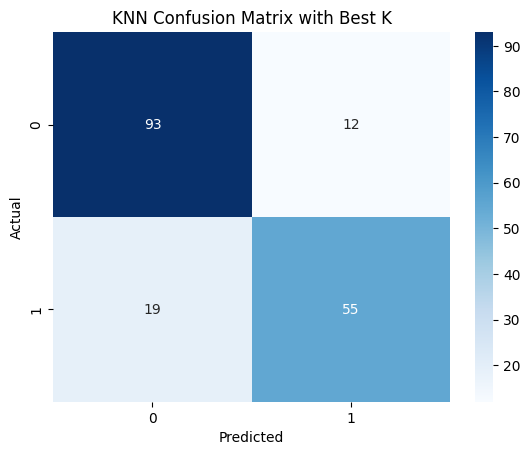

In [ ]:
confusion_matrix_plot("""KNN Confusion Matrix with Best K""", y_test, y_pred_best)

### Interview Insight:
 - “I used KNN on the Titanic dataset after scaling features to ensure fair distance comparisons. I tuned the number of neighbors using cross-validation and evaluated performance using accuracy, precision, recall, and confusion matrix. KNN gave me a strong baseline and highlighted the importance of preprocessing in distance-based models.”

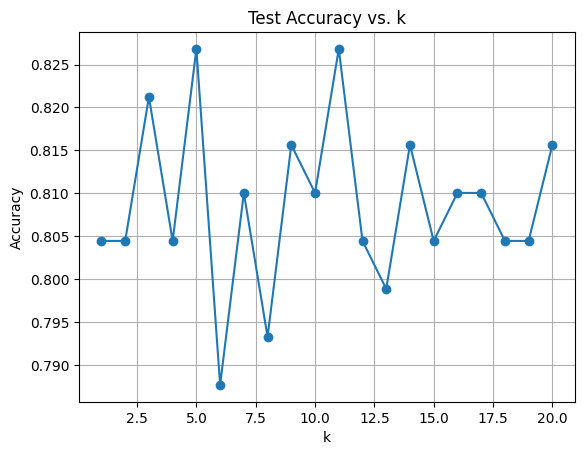

In [ ]:
test_accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    test_accuracies.append(acc)

plt.plot(range(1, 21), test_accuracies, marker='o')
plt.title('Test Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


###Conclusion based on accuracy, recall and F1-Score:
  - Metric	k = 5	k = 11	Change:
  - Class 0(Not Survive)
- Precision:	0.84	| 0.83	↓ Slightly less confident.
- Recall:     0.87	| 0.89	↑ Better at catching non-survivors.
- F1-Score	0.85	0.86	↑ Slight improvement overall.
  - Class 1(Survived):

 - Precision	0.80	| 0.82	↑ More confident predictions
 - Recall	0.77	| 0.74	↓ Misses more actual survivors
 - F1-Score	0.79	| 0.78	↓ Slight drop in balance
  - Although both k = 5 and k = 11 yield the same overall accuracy, their class-level metrics differ.
  - k = 5 favors recall for survivors, while k = 11 improves recall for non-survivors.
  - I’d choose based on the cost of false negatives vs false positives in the application domain.

##DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Initialize with default params  (tune later)
dt_model = DecisionTreeClassifier(random_state=42)

###Step2: Train the Model

In [ ]:
#Train Model on training datasets
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Make predictions using test dataset
y_pred_dt = dt_model.predict(X_test)

### Visualizing the performance of Decision Tree

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       105
           1       0.71      0.72      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



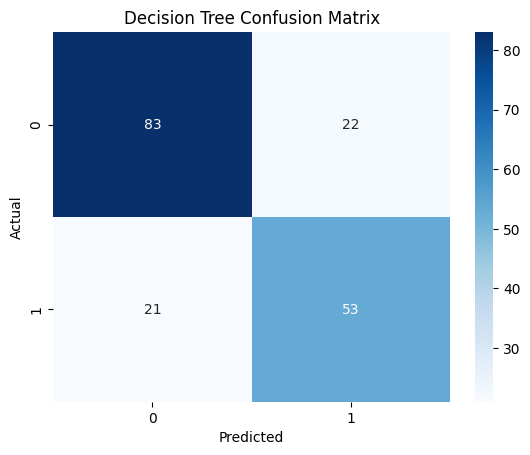

In [ ]:
confusion_matrix_plot("Decision Tree Confusion Matrix", y_test, y_pred_dt)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini','entropy']
}

###Tuning Model:
 - Gini impurity and entropy are measures of node impurity in Decision Trees. Gini measure the probabiliyt of misclassfying a chosen value or class, while entropy measure information disorder. these measurements guide the Decision Tree to split where purity improves most. Gini is faster, entropy is more sensitive.

In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [ ]:
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

#Evaluation Performance after Tuning hyperparameters

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



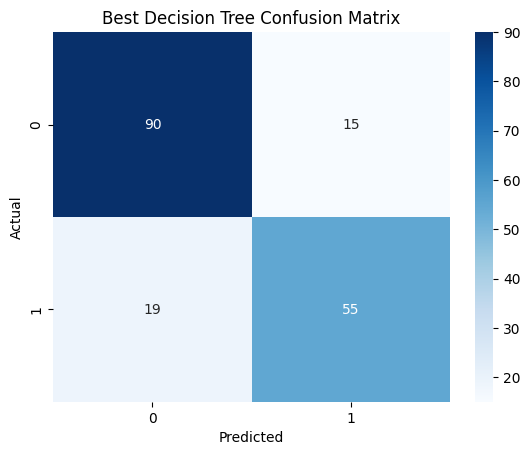

In [ ]:
confusion_matrix_plot("Best Decision Tree Confusion Matrix", y_test, y_pred_best_dt)

- Trained a Decision Tree classifier on the Titanic Dataset, tuning depth, and split criteria to balance bias and variance.
- Evaluated a performance using accuracy, precision, recall and visualized feature importance and decision paths.

###Decision Tree visualization based on feature splitting

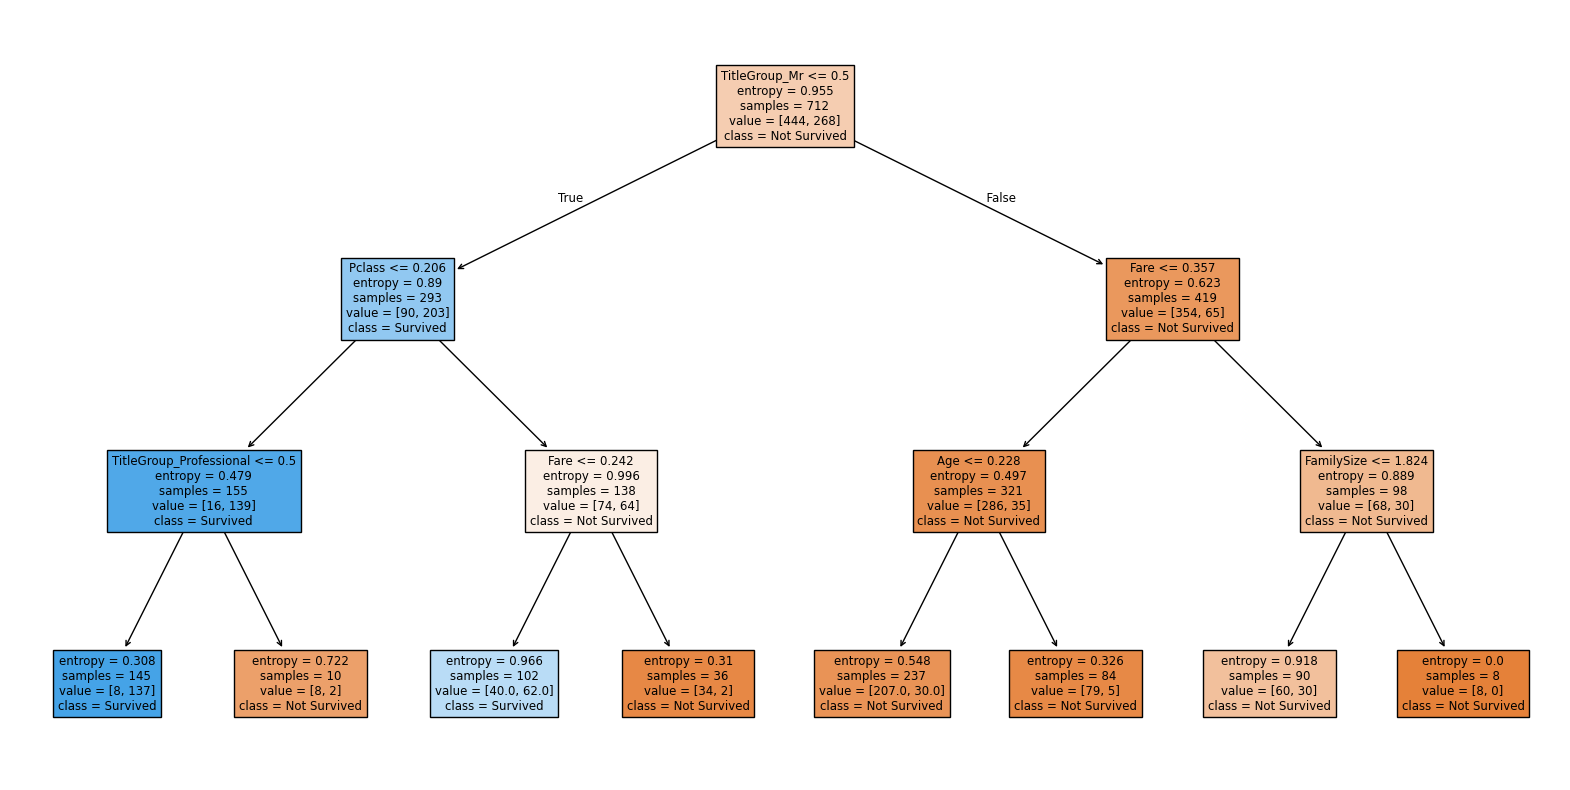

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled = True)
plt.show()

In [ ]:
#Getting feature importance from the best DTree
importance = best_dt.feature_importances_

#Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':importance,
    }).sort_values(by='Importance', ascending=False)

feature_importance_df



,Feature,Importance
8,TitleGroup_Mr,0.569167
0,Pclass,0.175685
3,Fare,0.150623
10,TitleGroup_Professional,0.080296
4,FamilySize,0.015925
2,Age,0.008305
1,Sex,0.000000
5,IsAlone,0.000000
7,TitleGroup_Miss,0.000000
6,TitleGroup_Military,0.000000


###Visualizing Feature Impotrance

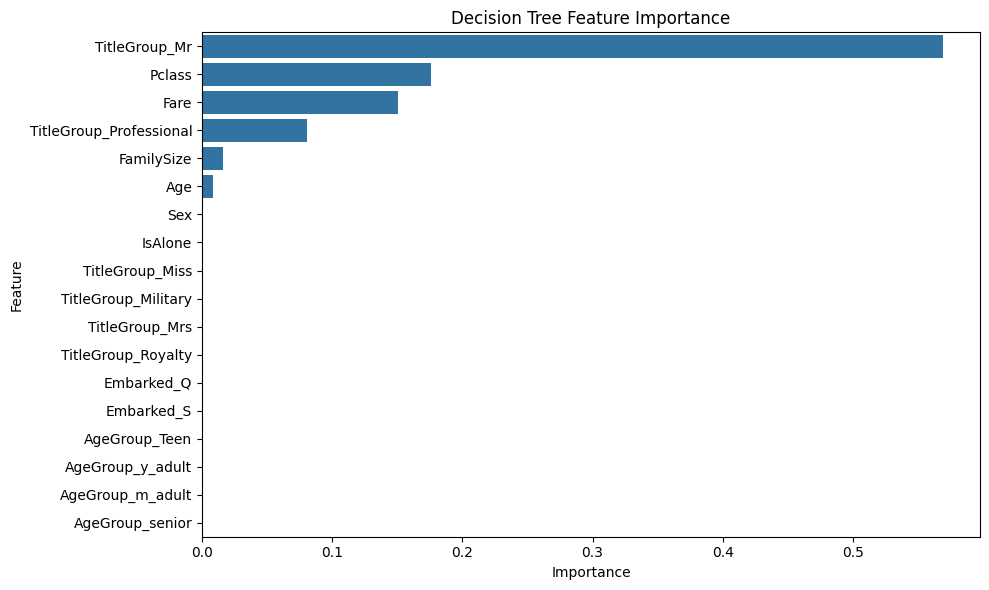

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data = feature_importance_df)
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()


###Interpretation:
- Extracted feature importances from Decision Tree trained on Titanic Dataset. The model prioritize feautures like
  - TitleGroup_Mr:High importance suggests that male passengers(specially those labeled  "Mr") had a distinct survival pattern. Likeyly correlated with lower survival rates due to gender and class norms.
  - Pclass: Strong signal, lower-class passengers (Pclass=3) has significantly lower survival odds. Reflects historical access to lifeboats and cabin location.
  - Farte: Indicates socioecnomic status. Higher fairs, first class, higher survival probability. Scaling this feature helped the tree interpre it faily.
- which aligns with domain intuition. Visualizing these features provides insights to interpret the model and validate feature engineering choices.


##Random Forest

###STEP 1: Import and Initialize

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Initialize Forest and tune params later.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

- Setting n_estimator=100 to balance performance and efficiency, ensuring the forest had enough trees to reduce variance.
- Using random_state=42 to make results reproducible accross runs, which is essential for debugging and sharing models.

###STEP 2: Train the Model

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)

(712, 18)

(712,)

(179, 18)

###STEP 3: Make predictions

In [ ]:
y_pred_rf = rf_model.predict(X_test)


###STEP 4: Evaluate Performance

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



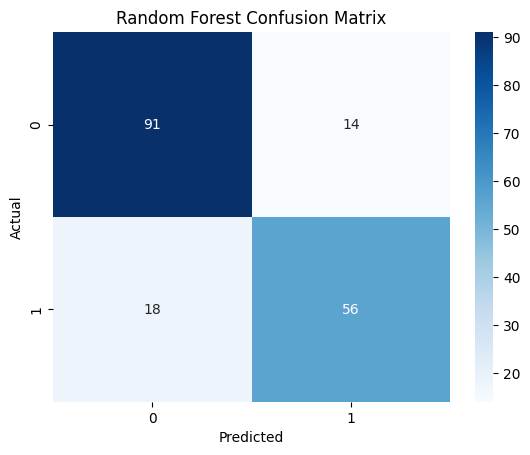

In [ ]:
confusion_matrix_plot("Random Forest Confusion Matrix", y_test, y_pred_rf)


###Extracting Feature Importance

In [ ]:
importance_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':importance_rf,
    }).sort_values(by='Importance', ascending=False)


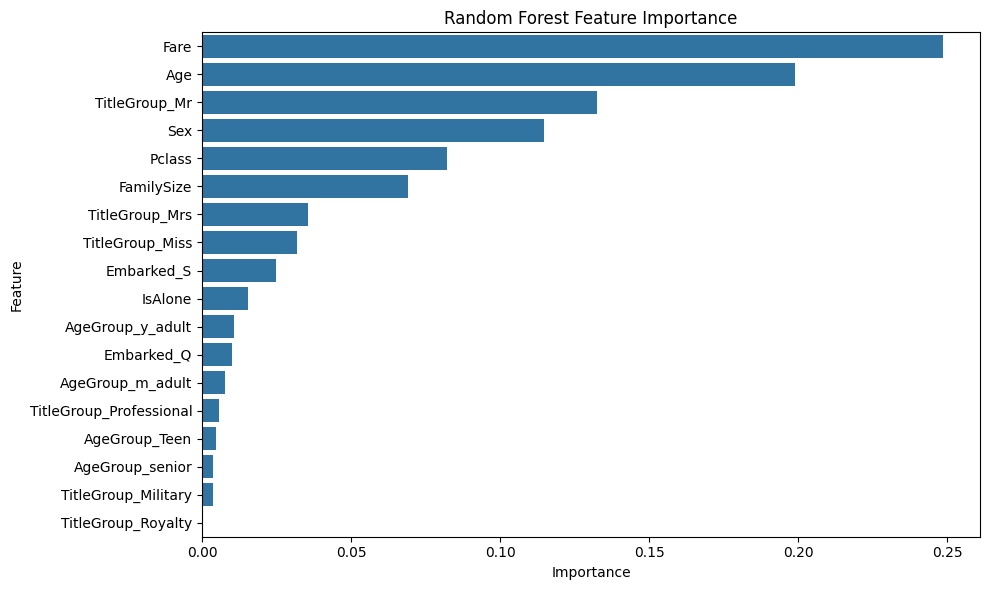

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data = feature_importance_df_rf)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

###Interpretation of Feature Importances:
- Engineered features like TitleGroup_Mr and TitlesGroup_Mrs are outperforming raw categorical variables.
-Fare and Age dominate because they encode continuous gradients of risk and privilege.
- The model is choosing social, econimic and demographic signal, exactly what expected from a well-preprocessed Titanic model.

##SHAP Values: How much each feature contributes to the prediction.


- SHAP treats each features like a player in a cooperative game and calculates how much each one contributes to the final outcome.
- Explains individual predictions, not just global feature importance.
- Works with any model (tree-based, linear, neural nets).
- Shows positive and negative contributions for each feature.
- Helps debug, trust, and communicate your models's decisions.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   712 non-null    float64
 1   Sex                      712 non-null    int64  
 2   Age                      712 non-null    float64
 3   Fare                     712 non-null    float64
 4   FamilySize               712 non-null    float64
 5   IsAlone                  712 non-null    int64  
 6   TitleGroup_Military      712 non-null    bool   
 7   TitleGroup_Miss          712 non-null    bool   
 8   TitleGroup_Mr            712 non-null    bool   
 9   TitleGroup_Mrs           712 non-null    bool   
 10  TitleGroup_Professional  712 non-null    bool   
 11  TitleGroup_Royalty       712 non-null    bool   
 12  Embarked_Q               712 non-null    bool   
 13  Embarked_S               712 non-null    bool   
 14  AgeGroup_Teen            712 

In [ ]:
import shap
shap.initjs()
#Create a SHAP explainer object and works great with RandomForest
X_train_fixed = X_train.astype(float)
display(X_train_fixed.shape)

X_test_fixed = X_test.astype(float)
display(X_test.shape)

explainer = shap.Explainer(rf_model, X_train_fixed, algorithm= 'tree')

(712, 18)

(179, 18)

In [ ]:
shap_values = explainer(X_test_fixed, check_additivity=False)


###Visualizing SHAP VALUES

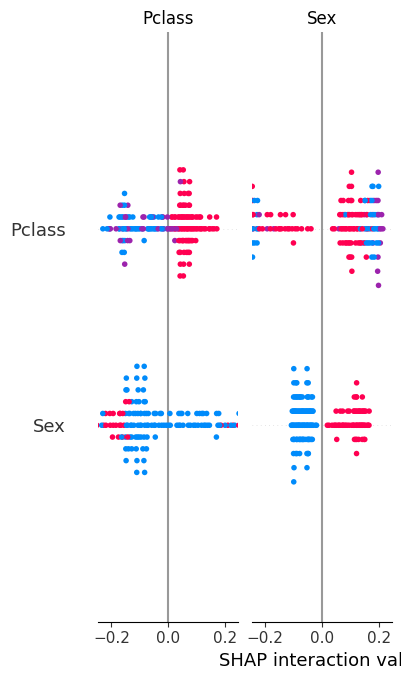

In [ ]:
shap.summary_plot(shap_values, X_test_fixed, plot_type='dot')

##XGBoost

- XGBoost(Extrem Gradient Boosting): It is a highly optimized implementation of gradient boosting.
  - Fast
  - Regularized (to prevent overfitting) uses L1/L2 for better regularization.
  - Parallelizable
  -Work well with imbalance data.
  -Offers feature importance, early stopoing and custom loss functions.
  - Often the go-to model for structured/tabular datasets.
- It builds an assemble of decision trees, where each new tree corrects the erros of the previous ones.


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    eval_metric='logloss'
    )

In [ ]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



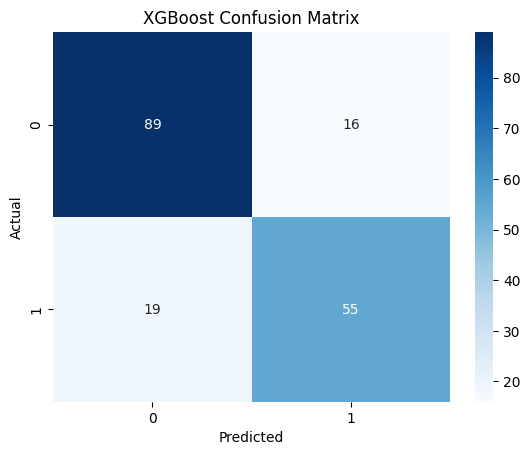

In [ ]:
confusion_matrix_plot("XGBoost Confusion Matrix", y_test, y_pred_xgb)


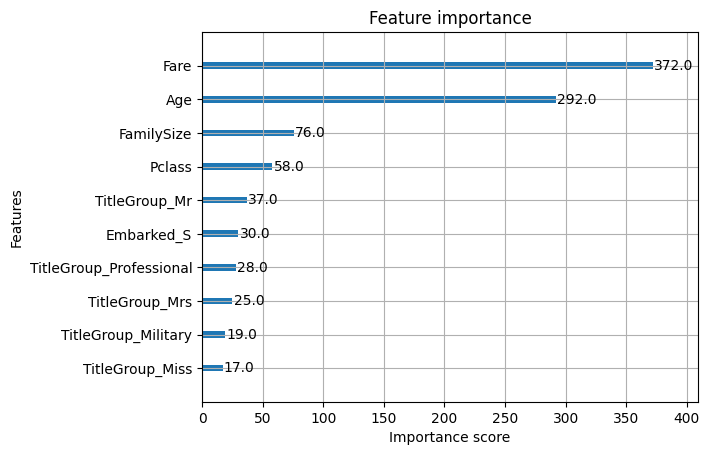

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=10)
plt.show()

I trained a XGBoost classifier on the Titanic Dataset to leverage gradient boosting's ability to correct erros iteritavely. Its regularization and handling of missing values made it ideal for tabular data. Feature importance confirmed that engineering

##Hyperparameter Tuning for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.3, 0.5], #L1
    'reg_lambda': [0, 0.1, 0.3, 0.5] #L2
}

In [ ]:
xgb = XGBClassifier(random_state=42,
                    eval_metric='logloss'
                    )

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=1)


In [ ]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 6], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 0.3, 0.5],
                         'reg_lambda': [0, 0.1, 0.3, 0.5],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Best Score: {grid_search_xgb.best_score_}")

###Retraining final XGBoost model

In [2]:
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

###Evaluate the Tuned Model

In [ ]:
confusion_matrix_plot("Best XGBoost Confusion Matrix", y_test, y_pred_best_xgb)

- I tuned XGBoost model using GridSearchCV, optimizing parameters like max_depth, learning_ratem and regularization terms. This improved generalization and reduced overfitting.